## 1. Import necessary libraries for Training the model

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score,precision_score, recall_score, roc_auc_score, confusion_matrix,roc_curve,auc)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import classification_report
import joblib as jb

## 2. Loading the preprocessed data 

In [2]:
df = pd.read_csv(r'C:\Users\Frank\OneDrive\Documentos\ITRI 616 Semester Project\diabetic_data_cleaned.csv')

## 3 .Preparing the data for training

In [3]:
df['target'] = df['readmitted_30'].apply(lambda x: 1 if x == 1 else 0)

In [4]:
#Drops unnecessary columns
cols_to_drop = ['patient_nbr', 'readmitted', 'weight', 'payer_code', 'medical_specialty', 'readmitted_30', 'readmitted_any']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(cols_to_drop, axis=1)

In [5]:
#converts categorical variables to numerical
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

## 4. Training the model using Train-Test split of (70-30)

In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Class distribution in training set: \n{y_train.value_counts(normalize=True)}")

Training samples: 71236
Testing samples: 30530
Class distribution in training set: 
target
0    0.888399
1    0.111601
Name: proportion, dtype: float64


In [8]:
#   Initializing the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [9]:
#handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
param_grid = {
    'n_estimators': [100],       # Skip 200
    'max_depth': [3, 5],         # Depth 7 is too slow
    'learning_rate': [0.1],      # Skip 0.01 
    'subsample': [0.8]           # Remove 1.0
}

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,           # Test only 5 random combos 
    cv=3,               # Uses 3-fold
    n_jobs=1,           
    verbose=3
)

In [13]:
#Performing grid search
print("Starting grid search")
random_search.fit(X_train_res, y_train_res)

Starting grid search
Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.785 total time=   0.7s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.949 total time=   0.7s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.954 total time=   0.7s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=0.797 total time=   0.8s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=0.978 total time=   0.8s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=0.979 total time=   0.8s


C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:15:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100],
                                        'subsample': [0.8]},
                   verbose=3)

In [14]:
# Use this best model for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [15]:
print("Best score:", random_search.best_score_)  # Cross-validation AUC/accuracy

Best score: 0.9179128172948833


In [16]:

jb.dump(best_model, 'best_xgboost_model.pkl')  
X_test.to_csv('test_data.csv', index=False)  

## 5.Test the model


COMPREHENSIVE MODEL EVALUATION

Primary Metrics:
--------------------------------------------------
Accuracy: 0.8851
Precision: 0.2340
Recall: 0.0129
F1-Score: 0.0245
ROC AUC: 0.6094

Confusion Matrix Analysis:
--------------------------------------------------


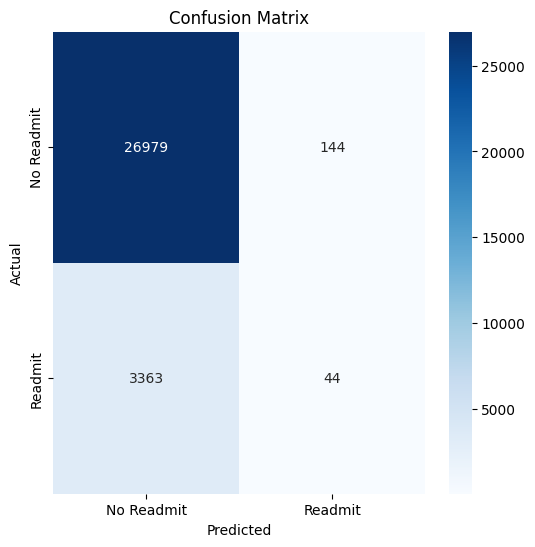

In [17]:
print("\n" + "="*50)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*50 + "\n")


print("Primary Metrics:")
print("-"*50)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# 2. Confusion Matrix Analysis
print("Confusion Matrix Analysis:")
print("-"*50)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Readmit', 'Readmit'],
            yticklabels=['No Readmit', 'Readmit'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')  # Save for report
plt.show()


ROC Curve Analysis:
--------------------------------------------------


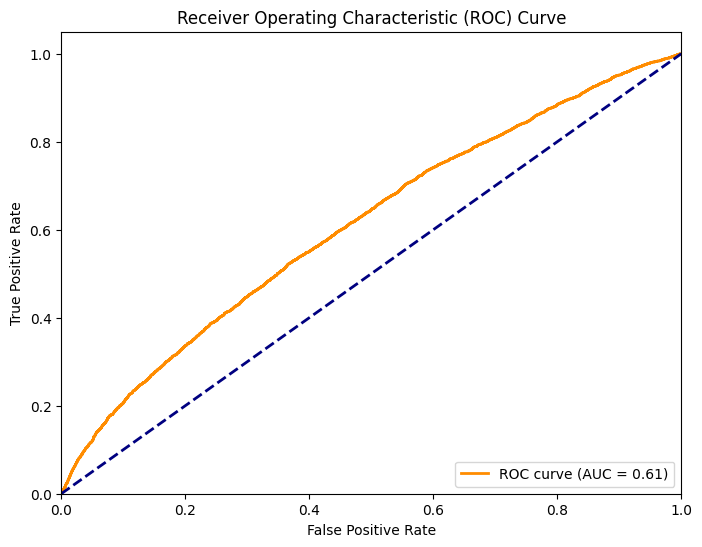

In [18]:
# 3. ROC Curve (as specified in project)
print("\nROC Curve Analysis:")
print("-"*50)
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')  # Save for report
plt.show()


Precision-Recall Analysis:
--------------------------------------------------


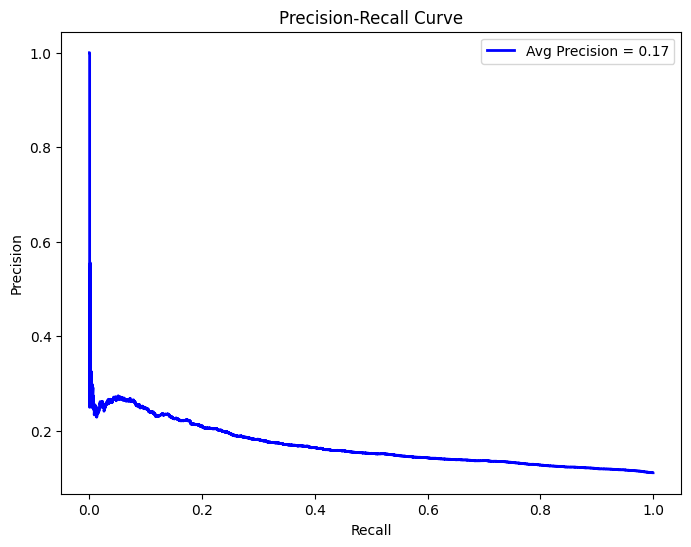

In [19]:
# 4. Precision-Recall Curve (as specified in project)
from sklearn.metrics import precision_recall_curve, average_precision_score
print("\nPrecision-Recall Analysis:")
print("-"*50)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
avg_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2,
         label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.savefig('precision_recall_curve.png')  # Save for report
plt.show()


Feature Importance Analysis:
--------------------------------------------------


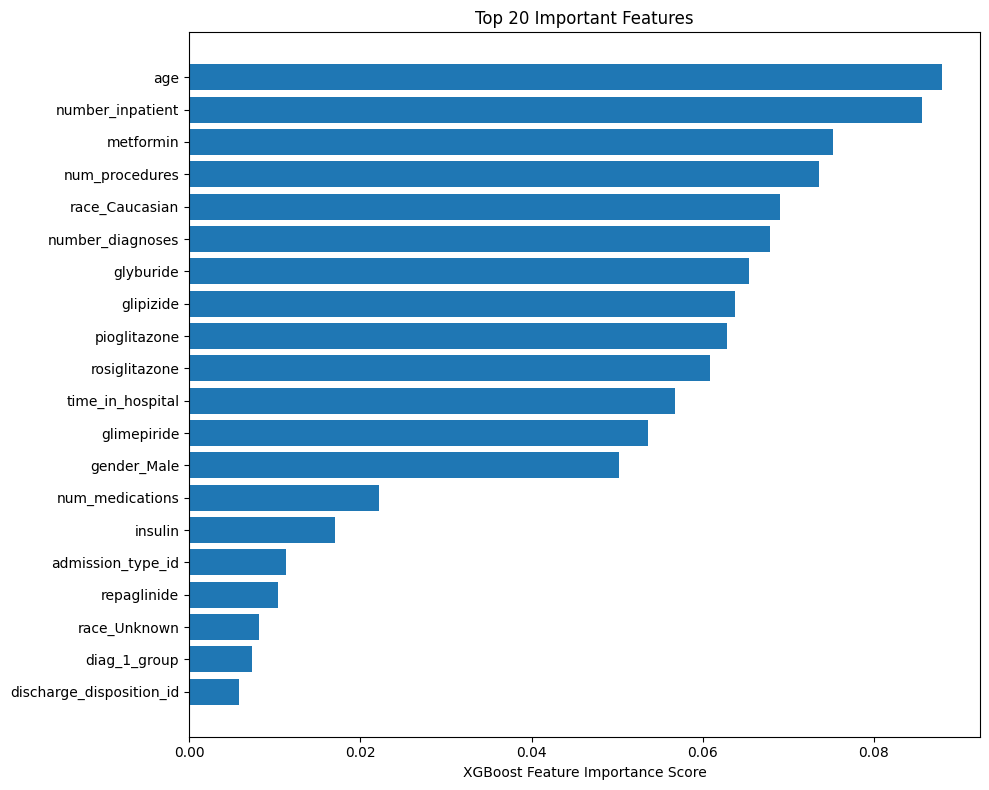

In [20]:
# 5. Feature Importance (for report)
print("\nFeature Importance Analysis:")
print("-"*50)
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]  # Top 20 features

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('XGBoost Feature Importance Score')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save for report
plt.show()

In [21]:
# 6. Classification Report (detailed metrics)
print("\nDetailed Classification Report:")
print("-"*50)
print(classification_report(y_test, y_pred, target_names=['No Readmit', 'Readmit']))


Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

  No Readmit       0.89      0.99      0.94     27123
     Readmit       0.23      0.01      0.02      3407

    accuracy                           0.89     30530
   macro avg       0.56      0.50      0.48     30530
weighted avg       0.82      0.89      0.84     30530



In [22]:
# 7. Computational Considerations
print("\nComputational Analysis:")
print("-"*50)
print(f"Number of Features: {X_train.shape[1]}")
print(f"Training Samples: {X_train_res.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")
print(f"Positive Class Ratio: {sum(y_train_res)/len(y_train_res):.2%} (after SMOTE)")


Computational Analysis:
--------------------------------------------------
Number of Features: 50
Training Samples: 126572
Test Samples: 30530
Positive Class Ratio: 50.00% (after SMOTE)
